### Mounting drive to access the dataset zip




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Unzipping the dataset

In [ ]:
%%capture
!unzip "/content/drive/MyDrive/news_articles.zip"


Archive:  /content/drive/MyDrive/news_articles.zip
replace BBC News Summary/News Articles/business/001.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Reading the text files and extracting the articles and their summaries

In [ ]:
directories = ["business","entertainment","politics","sport","tech"]
articles = []
summaries = []
for i in directories:
  for k in range(1,10): ## We extract 10 articles from each domain from the text files
    f1 = open("/content/BBC News Summary/News Articles/"+i+"/"+str(k).zfill(3)+".txt", "rb")
    articles.append(f1.read())
    f2 = open("/content/BBC News Summary/Summaries/"+i+"/"+str(k).zfill(3)+".txt", "rb")
    summaries.append(f2.read())




In [ ]:
articles[1]


b'Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAnd Alan Greenspan highlighted the US government\'s willingness to curb spending and rising household savings as factors which may help to reduce it. In late trading in New York, the dollar reached $1.2871 against the euro, from $1.2974 on Thursday. Market concerns about the deficit has hit the greenback in recent months. On Friday, Federal Reserve chairman Mr Greenspan\'s speech in London ahead of the meeting of G7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected US jobs data. "I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York. "He\'s taking a longer-term view, laying out a set of conditions 

In [ ]:
summaries[1]

b'The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.China\'s currency remains pegged to the dollar and the US currency\'s sharp falls in recent months have therefore made Chinese export prices highly competitive.Market concerns about the deficit has hit the greenback in recent months."I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York.The recent falls have partly been the result of big budget deficits, as well as the US\'s yawning current account gap, both of which need to be funded by the buying of US bonds and assets by foreign firms and governments."He\'s taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next."'

### Creating a dataframe for preprocessing the dataset

In [ ]:
import pandas as pd
data = pd.DataFrame(list(zip(articles,summaries)),columns=['article','summary'])

In [ ]:
data.head()

,article,summary
0,b'Ad sales boost Time Warner profit\n\nQuarter...,"b""TimeWarner said fourth quarter sales rose 2%..."
1,b'Dollar gains on Greenspan speech\n\nThe doll...,b'The dollar has hit its highest level against...
2,b'Yukos unit buyer faces loan claim\n\nThe own...,b'Yukos\' owner Menatep Group says it will ask...
3,b'High fuel prices hit BA\'s profits\n\nBritis...,"b'Rod Eddington, BA\'s chief executive, said t..."
4,"b""Pernod takeover talk lifts Domecq\n\nShares ...","b""Pernod has reduced the debt it took on to fu..."


### Preprocessing the dataset

In [ ]:
import re

def preprocess_text(text):
    text = str(text)

    text = re.sub("\\n\\n", ' ', text)
    text = re.sub(r"b'|'$", '', text) ## some preprocessing for bytes like objects
    text = re.sub(r'[^a-zA-Z0-9\s.,!?\'-]', '', text) ## get rid of everything but alphanumeric characters and periods
    text = text.lower() ## convert to lower case
    text = re.sub(r'\s+', ' ', text) ## get rid of extra spaces


    return text

## Apply to the summaries and articles
data['summary'] = data['summary'].apply(preprocess_text)
data['article'] = data['article'].apply(preprocess_text)

In [ ]:
data.head()

,article,summary
0,ad sales boost time warner profitnnquarterly p...,btimewarner said fourth quarter sales rose 2 t...
1,dollar gains on greenspan speechnnthe dollar h...,the dollar has hit its highest level against t...
2,yukos unit buyer faces loan claimnnthe owners ...,yukos' owner menatep group says it will ask ro...
3,high fuel prices hit ba's profitsnnbritish air...,"rod eddington, ba's chief executive, said the ..."
4,bpernod takeover talk lifts domecqnnshares in ...,bpernod has reduced the debt it took on to fun...


In [ ]:

import nltk
nltk.download('punkt')

## We use the sentence tokenizer to split the article into sentences
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Using the NLTK sentence tokenizer in order to split the articles into sentences

In [ ]:
def tokenize_text(data,column):
  tokenized_text = []
  for i in data[column]: ## for every article or summary
    sentences = sent_tokenize(i) ## create a list of sentences
    tokenized_text.append(sentences) ## append to collection of text
  return tokenized_text


tokenized_articles = tokenize_text(data,"article")
tokenized_summaries = tokenize_text(data,"summary")

In [ ]:
tokenized_articles[1]

["dollar gains on greenspan speechnnthe dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.nnand alan greenspan highlighted the us government's willingness to curb spending and rising household savings as factors which may help to reduce it.",
 'in late trading in new york, the dollar reached 1.2871 against the euro, from 1.2974 on thursday.',
 'market concerns about the deficit has hit the greenback in recent months.',
 "on friday, federal reserve chairman mr greenspan's speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data.",
 "i think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time, said robert sinche, head of currency strategy at bank of america in new york.",
 "he's taking a longer-term view, laying out a set of condi

### Vectorizing every word in every article sentence and then adding up the word vectors so as to create a sentence vector

In [ ]:
from gensim.models import Word2Vec ## Use word2vec embeddings to vectorize words in a sentence
sentences = []
for i in tokenized_articles:
  for j in i:
    words = nltk.word_tokenize(j) ## Use a word tokenizer to tokenize words in a sentence
    sentences.append(words)



In [ ]:
model = Word2Vec(sentences, vector_size=50,min_count=1) ## fit the word2vec model on the given sentences

In [ ]:
import numpy as np

In [ ]:
def vectorize(text, model):
  text_representation = []
  for i in text:
    sentence_vector = np.zeros(50) ## create an empty sentence vector
    for j in nltk.word_tokenize(i): ## obtain the word vector from the word2vec model
          sentence_vector+= model.wv[j] ## add the word vector to the sentence vector
    sentence_vector = sentence_vector/len(nltk.word_tokenize(i)) ## divide thevector by the number of words to get the mean
    text_representation.append(sentence_vector)
  return text_representation

In [ ]:
vectorized_articles = []
for i in tokenized_articles:
  vectorized_articles.append(vectorize(i,model))

## K-means clustering

### Clustering the sentences for all the articles

In [ ]:
from sklearn.cluster import KMeans

article_clusters_kmeans = []
models = []
for i in range(0,len(vectorized_articles)): ## for every article
  k = 5
  model_kmeans = KMeans(k, random_state = 42,n_init=10) ## initialze the model
  models.append(model_kmeans)
  if(len(vectorized_articles[i])>1):
    clusters = model_kmeans.fit_predict( vectorized_articles[i]) ## use kmeans to cluster the sentences
    article_clusters_kmeans.append(clusters) ## store assigned labels



### Using the distances of each sentence from the cluster centroid in order to select the representative sentence to add in the summary

In [ ]:
from scipy.spatial import distance

def getDistance(model,i, vector): ## this function returns the distance of a point from its centroid
  return distance.euclidean(model.cluster_centers_[i],vector)

def returnArticleSummary(tokenized_sentences,vectorized_sentences,cluster,model):
  selected_sentences = dict() ## a dictionary to store (cluster, representative sentence pairs)
  summary = dict()
  for i in range(0,len(tokenized_sentences)):
    if (cluster[i] not in selected_sentences): ## initialize the selected sentence
      selected_sentences[cluster[i]] = vectorized_sentences[i]
      summary[cluster[i]] = tokenized_sentences[i]
    else:
      centroid = cluster[i]
      if getDistance(model,centroid,selected_sentences[cluster[i]]) > getDistance(model,centroid,vectorized_sentences[i]):
        ## replace the representative sentence if the current sentence is closer to the centroid
        selected_sentences[cluster[i]] = vectorized_sentences[i]
        summary[cluster[i]] = tokenized_sentences[i]

  return " ".join(summary.values()) ## concatenate the selected sentences and return the summary

In [ ]:
print(returnArticleSummary(tokenized_articles[1],vectorized_articles[1],article_clusters_kmeans[1],models[1]))

dollar gains on greenspan speechnnthe dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.nnand alan greenspan highlighted the us government's willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached 1.2871 against the euro, from 1.2974 on thursday. he's taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next.nnworries about the deficit concerns about china do, however, remain. i think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time, said robert sinche, head of currency strategy at bank of america in new york. in the meantime, the us federal reserve's decision on 2 february to boost interest rates by a quarter of a point - the sixth such move in as many months - has open

In [ ]:
print(summaries[1])

b'The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.China\'s currency remains pegged to the dollar and the US currency\'s sharp falls in recent months have therefore made Chinese export prices highly competitive.Market concerns about the deficit has hit the greenback in recent months."I think the chairman\'s taking a much more sanguine view on the current account deficit than he\'s taken for some time," said Robert Sinche, head of currency strategy at Bank of America in New York.The recent falls have partly been the result of big budget deficits, as well as the US\'s yawning current account gap, both of which need to be funded by the buying of US bonds and assets by foreign firms and governments."He\'s taking a longer-term view, laying out a set of conditions under which the current account deficit can improve this year and next."'


In [ ]:
predicted_summaries_kmeans = []
for i in range(0,len(vectorized_articles)):
  ## generate summaries for every article
  predicted_summaries_kmeans.append(returnArticleSummary(tokenized_articles[i],vectorized_articles[i],article_clusters_kmeans[i],models[i]))
  if(i>=0 and i<=3):
    print(returnArticleSummary(tokenized_articles[i],vectorized_articles[i],article_clusters_kmeans[i],models[i]))
    print()
    print(summaries[i])
    print("*"*15)

ad sales boost time warner profitnnquarterly profits at us media giant timewarner jumped 76 to 1.13bn xc2xa3600m for the three months to december, from 639m year-earlier.nnthe firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2 to 11.1bn from 10.9bn. it intends to adjust the way it accounts for a deal with german music publisher bertelsmann's purchase of a stake in aol europe, which it had reported as advertising revenue. for the full-year, timewarner posted a profit of 3.36bn, up 27 from its 2003 performance, while revenues grew 6.4 to 42.09bn. it will now book the sale of its stake in aol europe as a loss on the value of that stake.n

b"TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.Quarterly profits at US

## Kruskal's clustering

In [ ]:
def kruskal_clustering(data, k):
    n = len(data)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distances[i][j] = np.linalg.norm(data[i] - data[j])   ## computes the Euclidean distance of the vector
            distances[j][i] = distances[i][j]
    clusters = [{i} for i in range(n)]  ## initializaing clusters
    ## function to find the cluster to which a point belongs
    def find_cluster(point):
        for cluster in clusters:
            if point in cluster:
                return cluster
    ## merge clusters until the desired number of clusters is reached
    while len(clusters) > k:
        min_distance = float('inf')
        merge_clusters = None
        for i in range(n):
            for j in range(i+1, n):
                cluster_i = find_cluster(i)
                cluster_j = find_cluster(j)
                if cluster_i != cluster_j and distances[i][j] < min_distance:  ## finding the closest pair of clusters
                    min_distance = distances[i][j]
                    merge_clusters = (cluster_i, cluster_j)
        merge_clusters[0].update(merge_clusters[1])   ## merging the closest pair of clusters
        clusters.remove(merge_clusters[1])
    cluster_labels = np.zeros(n, dtype=int)     ## assigning labels to clusters
    for i, cluster in enumerate(clusters):
        for point in cluster:
            cluster_labels[point] = i + 1
    return cluster_labels

In [ ]:
article_clusters_kruskal = []
k = 5
for i in range(0,len(vectorized_articles)): ## perform the clustering for every article
  article_clusters_kruskal.append(kruskal_clustering(vectorized_articles[i],k))

In [ ]:
def getCentroids(vectors,clusters): ## this function computes the centroid for every cluster
  centroids = dict()
  for i in range(0,len(vectors)):
    if(clusters[i] not in centroids):
      centroids[clusters[i]] = vectors[i]
    else:
      centroids[clusters[i]] += vectors[i] ## sum up the vectors that belong to every cluster separately

  for i in centroids:
    centroids[i] /= np.count_nonzero(clusters==i) ## compute the mean of the sum in order to find the centroid vector
  return centroids
  # return a dictionary of i, centroid

def getDistance(centroid, vector):
  return np.linalg.norm(centroid - vector)


def returnArticleSummaryKruskal(tokenized_sentences,vectorized_sentences,cluster,model):
  selected_sentences = dict() ## a dictionary to store (cluster, representative sentence pairs)
  summary = dict()
  centroids = getCentroids(vectorized_sentences,cluster) ## compute centroids for the given clusters
  for i in range(0,len(tokenized_sentences)):
    if (cluster[i] not in selected_sentences): ## initialize the selected sentence
      selected_sentences[cluster[i]] = vectorized_sentences[i]
      summary[cluster[i]] = tokenized_sentences[i]
    else:
      centroid = centroids[cluster[i]]
      if getDistance(centroid,selected_sentences[cluster[i]]) > getDistance(centroid,vectorized_sentences[i]):
        ## replace the representative sentence if the current sentence is closer to the centroid
        selected_sentences[cluster[i]] = vectorized_sentences[i]
        summary[cluster[i]] = tokenized_sentences[i]

  return " ".join(summary.values())

In [ ]:
predicted_summaries_kruskal = []
for i in range(0,len(vectorized_articles)): ## generate summaries using kruskal's algorithm
  predicted_summaries_kruskal.append(returnArticleSummaryKruskal(tokenized_articles[i],vectorized_articles[i],article_clusters_kruskal[i],models[i]))
  if(i>=0 and i<=3):
    print(returnArticleSummaryKruskal(tokenized_articles[i],vectorized_articles[i],article_clusters_kruskal[i],models[i]))
    print()
    print(summaries[i])
    print("*"*15)

ad sales boost time warner profitnnquarterly profits at us media giant timewarner jumped 76 to 1.13bn xc2xa3600m for the three months to december, from 639m year-earlier.nnthe firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2 to 11.1bn from 10.9bn. but its own internet business, aol, had has mixed fortunes. it has already offered to pay 300m to settle charges, in a deal that is under review by the sec. the company said it was unable to estimate the amount it needed to set aside for legal reserves, which it previously set at 500m.

b"TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09bn.Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (\xc2\xa3600m) for the three months to December, from $639m 

### Evaluating the summaries using ROUGE scores

In [ ]:
%%capture
!pip install evaluate
!pip install rouge_score

In [ ]:
import evaluate

In [ ]:
rouge = evaluate.load('rouge')

In [ ]:
results = []

## compute accuracy using generated and original (ground truth) summaries for every domain of articles
for i in range(0,41,10):
  results.append(rouge.compute(predictions=predicted_summaries_kmeans[i:i+10],references=tokenized_summaries[i:i+10]))



results.append(rouge.compute(predictions=predicted_summaries_kmeans[0:51],references=tokenized_summaries[0:51]))

In [ ]:
for i in range(len(results)-1):
  print(directories[i])
  print(results[i])

print("overall scores")
print(results[len(results)-1])

business
{'rouge1': 0.5973011100111805, 'rouge2': 0.4576040247796953, 'rougeL': 0.36161019098660085, 'rougeLsum': 0.36334769758811214}
entertainment
{'rouge1': 0.5350624190687989, 'rouge2': 0.421356959322747, 'rougeL': 0.3584974018406957, 'rougeLsum': 0.35626305488716087}
politics
{'rouge1': 0.5283269131773147, 'rouge2': 0.41366273400852416, 'rougeL': 0.33446508908391187, 'rougeLsum': 0.33486335660075317}
sport
{'rouge1': 0.5524877154843237, 'rouge2': 0.4310661667933581, 'rougeL': 0.355336767696107, 'rougeLsum': 0.35120048064491516}
tech
{'rouge1': 0.4393339434333378, 'rouge2': 0.2938058032610358, 'rougeL': 0.2539803100706287, 'rougeLsum': 0.2529633609180863}
average scores
{'rouge1': 0.5405144333648471, 'rouge2': 0.417270098546992, 'rougeL': 0.34078965352688173, 'rougeLsum': 0.3410514969978006}


In [ ]:
results = []
## compute accuracy using generated and original (ground truth) summaries for every domain of articles
for i in range(0,41,10):
  results.append(rouge.compute(predictions=predicted_summaries_kruskal[i:i+10],references=tokenized_summaries[i:i+10]))


results.append(rouge.compute(predictions=predicted_summaries_kruskal[0:51],references=tokenized_summaries[0:51]))

In [ ]:
for i in range(len(results)-1):
  print(directories[i])
  print(results[i])

print("overall scores")
print(results[len(results)-1])

business
{'rouge1': 0.591787897896163, 'rouge2': 0.45305087372383024, 'rougeL': 0.39161624113296967, 'rougeLsum': 0.38994501770525747}
entertainment
{'rouge1': 0.5736662725150339, 'rouge2': 0.4474359452877746, 'rougeL': 0.37741184567291997, 'rougeLsum': 0.37727573173095474}
politics
{'rouge1': 0.5123715313246651, 'rouge2': 0.3868661756347964, 'rougeL': 0.3158035781682046, 'rougeLsum': 0.31678031778012794}
sport
{'rouge1': 0.5946537698335139, 'rouge2': 0.506178513078076, 'rougeL': 0.390261902591013, 'rougeLsum': 0.3889841960771955}
tech
{'rouge1': 0.5038687525496036, 'rouge2': 0.35350513329176647, 'rougeL': 0.33201823897476074, 'rougeLsum': 0.3313197656490904}
average scores
{'rouge1': 0.561746848975751, 'rouge2': 0.4354016146857963, 'rougeL': 0.36476471598375265, 'rougeLsum': 0.3644275734044682}


### Visualizing the clusters

In [ ]:
from sklearn.decomposition import PCA

## Use PCA in order to reduce the 50-dimensional vectors to 2-dimensional vectors in order to visualize them

def visualize_clusters(vectors):
  vectors = np.array(vectors).T
  pca = PCA(n_components=2)
  pca.fit_transform(vectors)
  return pca

In [ ]:
model = visualize_clusters(vectorized_articles[1]) ## apply PCA on a random article

Text(0.5, 1.0, 'K-means algorithm clusters')

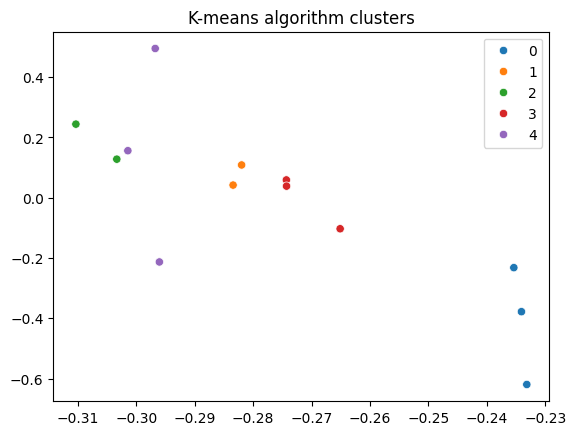

In [ ]:
import seaborn as sns

## plot a scatter plot for k-means clustering
sns.scatterplot(x = model.components_[0],y =model.components_[1],hue=article_clusters_kmeans[1],palette="tab10").set_title("K-means algorithm clusters")

Text(0.5, 1.0, "Kruskal's algorithm clusters")

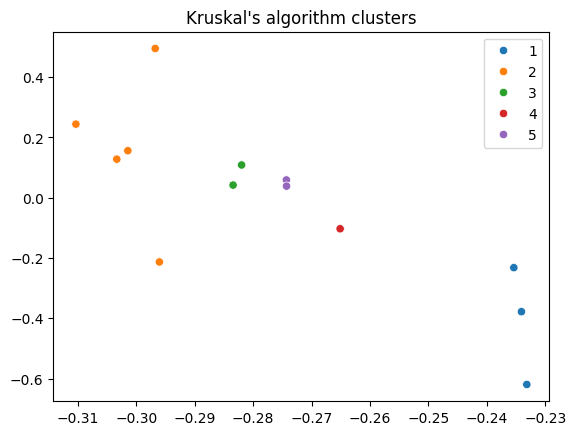

In [ ]:
## plot a scatter plot for kruskal's clustering
sns.scatterplot(x = model.components_[0],y =model.components_[1],hue=article_clusters_kruskal[1],palette="tab10").set_title("Kruskal's algorithm clusters")